## Chapter 9 - Miscellaneous Exercises

### TryIt 9.1 - Lag (Non-Ideal) Compensator
Use the following Python and Python Control Systems library to reproduce Figure 9.13.

Figure 9.13 is from Example 9.2 which explains how to design a lag-compensator.

The plant in question is

$$
G_{p} = \frac{K}{(s+1)(s+2)(s+10)}
$$

where $K = 164.6$. The lag-compensator is

$$
G_{c} = \frac{s+0.111}{s+0.01}
$$

In [5]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Create transfer function with zeros, poles, and gain
Gu = ct.zpk([],[-1,-2,-10],164.6)   # Create plant transfer function
Gc = ct.zpk([-0.111],[-0.01],1)     # Create lag compensator transfer function
Gce = Gu*Gc                         # Cascade the systems by multiplying

# Place open-loop transfer functions into a negative feedback loop
Tu = ct.feedback(Gu,1)              # Place uncompensated system in a unity feedback loop
Tc = ct.feedback(Gce,1)             # Place compensated system in a unity feedback loop

# Compute step responses for uncompensated and compensated systems
# For time series below, time in plot appears to be 20 sec. Sample time was chosen arbitrarily
t = np.arange(0, 20, 0.010) # Generate 20 second time series with 10ms sample time
Tu_resp = ct.step_response(Tu, t)
Tc_resp = ct.step_response(Tc, t)

# Plot uncompensated vs compensated step responses
y1 = Tu_resp.outputs['y[0]']
y2 = Tc_resp.outputs['y[0]']
plt.plot(t,y1,'k',t,y2,'dodgerblue')
plt.grid(True)
plt.legend(['Uncompensated', 'Lag-compensated'])
plt.ylabel('c(t)')
plt.xlabel('Time (seconds)')
plt.title('Uncompensated Vs Lag-Compensated Step Response')

Text(0.5, 1.0, 'Uncompensated Vs Lag-Compensated Step Response')

### Skill-Assessment Exercise 9.1
__PROBLEM:__ A unity feedback system with the forward function

$$
G(s) = \frac{K}{s(s+7)}
$$

is operating with a closed-loop step response that has a 15% overshoot. Do the following:

__a.__ Evaluate the steady-state error for a unit ramp input.

Find $K$ by plotting the root locus and locating where the root locus crosses the 15% overshoot radial line. The gain at this point (given by the `rlocus()` function) is $K$.

However, the radial lines in the root locus plots are given by damping ratio, not % overshoot. So the damping ratio will be found first (Eq 4.39).

$$
\zeta = \frac{-ln(OS/100)}{\sqrt{\pi^{2}+ln^{2}(OS/100)}} = \frac{-ln(15/100)}{\sqrt{\pi^{2}+ln^{2}(15/100)}} = 0.5169
$$

In [4]:
import numpy as np

os = 15 # Percent given as whole number
damp_rat = -np.log(os/100)/np.sqrt(np.pi**2+(np.log(os/100)**2))
print('Damping Ratio = %.4f' % damp_rat) # "damp rat" heh

Damping Ratio = 0.5169


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


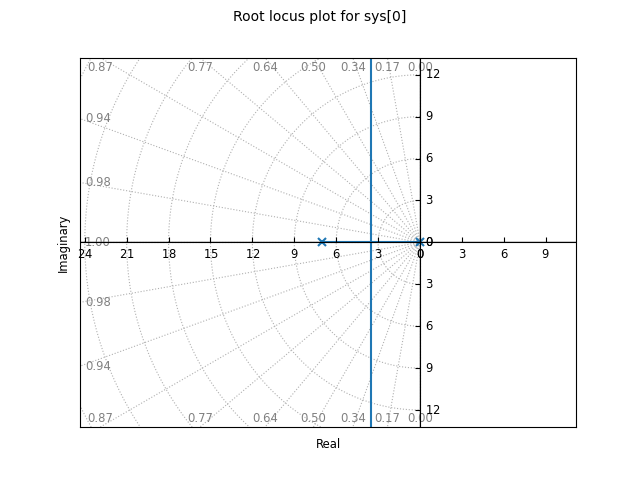

In [1]:
%matplotlib ipympl
import numpy as np
import control as ct

numg = [1]
deng = np.poly([0,-7])
G = ct.tf(numg, deng)
ct.rlocus(G)

Selecting a point on the root locus with a damping ratio value as close as possible to 0.5169, I selected $s=-3.506+5.805j$ with $K=45.94$.

Using Table 7.2, observe that the system is Type 1, and the steady-state error for a ramp input for this system type is

$$
e(\infty) = \frac{1}{K_{v}}
$$

where 

$$
K_{v} = \lim_{s\to0} sG(s) = \lim_{s\to0}\frac{K}{s+7} = \frac{45.94}{7} = 6.562857
$$

The steady-state error for a ramp input is then

$$
e(\infty) = \frac{1}{K_{v}} = \frac{7}{45.94} = 0.1524
$$

__b.__ Design a lag compensator to improve the steady-state error by a factor of 20.

Even though $e(\infty)$ was previously computed as $0.1524$, the book's answer as $0.1527$ will be used instead.

Followed Example 9.2 closely for this. Admittedly, there are some parts I don't quite understand.

To improve by a factor of 20, divide the error by 20:

$$
e(\infty) = \frac{0.1527}{20} = 0.007635
$$

Find the new compensated $K_{v}$

$$
e(\infty) = \frac{1}{K_{v}} => K_{v} = \frac{1}{e(\infty)} = \frac{20}{0.1527} = 130.975769
$$

The new compensator's zero and pole are equal to the ratio of new compensated $K_{v}$ to the old uncompensated $K_{v}$

$$
\frac{z_{c}}{p_{c}} = \frac{K_{vn}}{K_{vo}} = \frac{130.975767}{6.562857} = 19.95712 \approx 20
$$

Example 9.2 "arbitrarily" sets the compensator pole to $0.01$. My belief is this is done so that the pole is somewhat close to the origin. Regardless, this makes $p_{c} = 0.01$. Then,

$$
z_{c} = 20p_{c} = 20(0.01) = 0.2
$$

Thus, the lag compensator system is

$$
G_{lag}(s) = \frac{s+0.2}{s+0.01}
$$

__c.__ Evaluate the steady-state error for a unit ramp input to your compensated system.

Repeat step __a__ but with the new compensated $G_{c}(s)$. Plot the root locus of the compensated $G_{c}(s)$, find the new gain where the damping ratio line of 0.5169 intersects the new root locus plot, and use this new gain to compute the new steady-state error.

The new compensated $G_{c}(s)$ is

$$
G_{c}(s) = \frac{K(s+0.2)}{s(s+7)(s+0.01)}
$$

Plot the root locus of $G_{c}(s)$.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


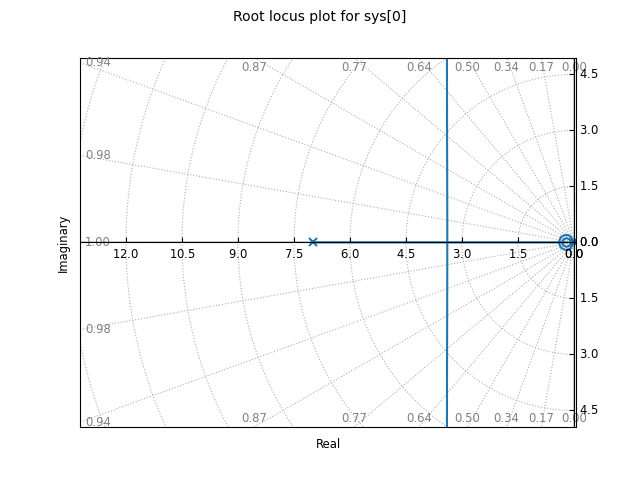

In [1]:
%matplotlib ipympl
import numpy as np
import control as ct

numg = np.poly([-0.2])
deng = np.poly([0,-7,-0.01])
G = ct.tf(numg, deng)
ct.rlocus(G)

Find the point on the root locus where the damping ratio of 0.5169 crosses. The point I selected was $s=-3.402+5.635j$ with $K = 44.66$.

Find $K_{v}$ which is needed to compute $e(\infty)$:

$$
K_{v} = \lim_{s\to0} sG_{c}(s) = \lim_{s\to0}\frac{K(s+0.2)}{(s+7)(s+0.01)} = \frac{44.66(0.2)}{(7)(0.01)} = 127.6
$$

Now compute $e(\infty)$:

$$
e(\infty) = \frac{1}{K_{v}} = \frac{1}{127.6} = 0.00783
$$

__d.__ Evaluate how much improvement in steady-state error was realized.

Divide the old uncompensated error found in part __a.__ by the new compensated error found in part __c.__

$$
\frac{0.1527}{0.0078} = 19.5769
$$